In [1]:
import pandas as pd;
import numpy as np;
import os
#from skimage.transform import resize
#from imageio import imread
import datetime
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from Generator import Generator
from ImageTensor import ImageTensor
from PlotShowData import PlotShowData
from Report import *
from CNN import CNN
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
#%load CNN.py
#%load PlotShowData.py
#%load Report.py

In [9]:
# initialize variables
folder_path = os.getcwd() 
#print(folder_path)

# directories for train and validation
train_dir = os.path.join(folder_path, "input", "train")
val_dir = os.path.join(folder_path, "input", "val")

# parameters for run
augmentation = False
n_frames = 30                               # no of frames to be in the tensor data
batch_size = 30                             # bath size set to 20
num_epocs = 40                              # no.of epochs to run 
modelName = ['MODEL1', 'MODEL2', 'MODEL3']  # model names to be passed to CNN for class initialization
train_flag = True

In [10]:
# get the Image Tensor
imgTensor = ImageTensor(n_frames=n_frames)

image_tensor = imgTensor.getImgTensor()

print ('# img_tensor =', image_tensor)

######### test code to check if generator works fine  #############

# generator = Generator(folder_path, train_dir, val_dir, train_flag, batch_size=20, imgTensor=image_tensor, augmentation=augmentation)
# sample_generator = generator.generator()

# sample_batch_data, sample_batch_labels = next(sample_generator)

# print(len(sample_batch_data), len(sample_batch_labels))
# print(sample_batch_data.shape, sample_batch_labels.shape)
# print("****Batch Data****")
# #print(sample_batch_data[:1])
# print("\n****Batch labels****")
# print(sample_batch_labels[:5])

# pltShow = PlotShowData()
# pltShow.plotSampleImage(sample_batch_data, sample_batch_labels)

############ End of test code ####################

# img_tensor = [array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]), 128, 128, 3]


In [11]:
# initialize the training and validation data
generator_trn = Generator(folder_path, train_dir, val_dir, train_flag, batch_size=batch_size, imgTensor=image_tensor, augmentation=augmentation)
train_generator = generator_trn.generator()
#num_train_sequences = generator_trn.no_of_sequence

generator_val = Generator(folder_path, train_dir, val_dir, False, batch_size=batch_size, imgTensor=image_tensor, augmentation=augmentation)
val_generator = generator_val.generator()
#num_val_sequences = generator_val.no_of_sequence

# compute the training and validation steps
steps_per_epoch = generator_trn.calculateSteps()
validation_steps = generator_val.calculateSteps()


In [13]:
#a,b = next(train_generator)

Source path =  /Users/jiten/Masters/Compute vision - CSC 528/CNN_Gesture_recognition/input/train ; batch size = 30


In [14]:
#a.shape, b.shape

((30, 20, 128, 128, 3), (30, 5))

In [12]:
# Empty dataframe to store the results
results_multiclass = pd.DataFrame({'model':[],
                        'epochs':[],
                        'training_loss':[],
                        'training_accuracy':[],
                        'validation_loss':[],
                        'validation_accuracy':[],
                        'validation_f1':[],
                        'validation_recall':[],
                        'validation_precision':[]})
results_multiclass.T

""
model
epochs
training_loss
training_accuracy
validation_loss
validation_accuracy
validation_f1
validation_recall
validation_precision


### Model 2

In [13]:
# initialize and compile the model
model = CNN(image_tensor)
model.initializeModel(modelName[1])
model.compileModel()

# set up the callback for the model fit
callback_list = model.callbackSetup(modelName[1])

# fit the model
model.fitModel(train_generator=train_generator, steps_per_epoch=steps_per_epoch,num_epochs=num_epocs, callbacks_list=callback_list, 
                val_generator=val_generator, validation_steps=validation_steps )


2024-05-24 23:33:16.709136: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-24 23:33:16.709728: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-24 23:33:16.710102: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Source path =  /Users/jiten/Masters/Compute vision - CSC 528/CNN_Gesture_recognition/input/train ; batch size = 30
Epoch 1/40


2024-05-24 23:33:19.617736: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-05-24 23:33:19.835572: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-24 23:33:19.836709: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_gra

23/23 [==============================] - ETA: 0s - loss: 0.9006 - categorical_accuracy: 0.6305 Source path =  /Users/jiten/Masters/Compute vision - CSC 528/CNN_Gesture_recognition/input/val ; batch size = 30


2024-05-24 23:38:12.292613: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-05-24 23:38:12.540865: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-24 23:38:12.541634: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_gra


Epoch 1: val_loss improved from inf to 0.79245, saving model to model_init_2024-05-2423_33_16.378358/model-keras.keras
23/23 [==============================] - 304s 13s/step - loss: 0.9006 - categorical_accuracy: 0.6305 - val_loss: 0.7924 - val_categorical_accuracy: 0.7000 - lr: 0.0010
Epoch 2/40
23/23 [==============================] - ETA: 0s - loss: 0.8446 - categorical_accuracy: 0.6377
Epoch 2: val_loss did not improve from 0.79245
23/23 [==============================] - 38s 2s/step - loss: 0.8446 - categorical_accuracy: 0.6377 - val_loss: 1.2894 - val_categorical_accuracy: 0.4750 - lr: 0.0010
Epoch 3/40
23/23 [==============================] - ETA: 0s - loss: 1.2200 - categorical_accuracy: 0.4348
Epoch 3: val_loss did not improve from 0.79245
23/23 [==============================] - 38s 2s/step - loss: 1.2200 - categorical_accuracy: 0.4348 - val_loss: 1.3947 - val_categorical_accuracy: 0.5250 - lr: 0.0010
Epoch 4/40
23/23 [==============================] - ETA: 0s - loss: 1.3418

In [14]:
model.model.summary()

Model: "mobilenet_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_4 (TimeDis  (None, 30, 4, 4, 1024)   3228864   
 tributed)                                                       
                                                                 
 time_distributed_5 (TimeDis  (None, 30, 4, 4, 1024)   4096      
 tributed)                                                       
                                                                 
 time_distributed_6 (TimeDis  (None, 30, 2, 2, 1024)   0         
 tributed)                                                       
                                                                 
 time_distributed_7 (TimeDis  (None, 30, 4096)         0         
 tributed)                                                       
                                                                 
 lstm_1 (LSTM)               (None, 256)            

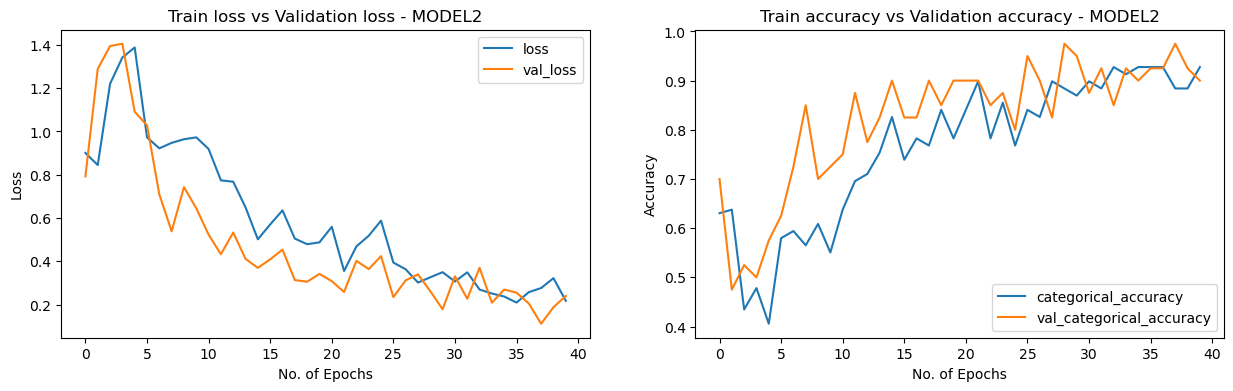

In [16]:
# plot the model history
pltShow = PlotShowData()
pltShow.plotModelHistory(model.history,modelName[1])

In [87]:
# def get_acc_loss(history):
    
#     loss_train = history.history['loss'][-1]
#     accuracy_train = history.history['categorical_accuracy'][-1]

#     loss_val = history.history['val_loss'][-1]
#     accuracy_val = history.history['val_categorical_accuracy'][-1]

#     print(f"\nThe accuracy of the training ::: {accuracy_train:.3f}")
#     print(f"The loss of the training ::: {loss_train:.3f}")
#     print("\n")
#     print(f"The accuracy of the validation ::: {accuracy_val:.3f}")
#     print(f"The loss of the validation ::: {loss_val:.3f}")

#     return loss_train, accuracy_train, loss_val, accuracy_val

In [32]:
# get the accuracy and loss of training
loss_train, acc_train, loss_val, acc_val = get_acc_loss(model.history)


The accuracy of the training ::: 0.928
The loss of the training ::: 0.217


The accuracy of the validation ::: 0.900
The loss of the validation ::: 0.240


In [90]:
def validate_data(model):
    generator_val1 = Generator(folder_path, train_dir, val_dir, False, batch_size=batch_size, imgTensor=image_tensor, augmentation=augmentation)
    val_generator1 = generator_val1.generator()
    validation_steps1 = generator_val1.calculateSteps()

    # Create empty lists to store the actual and predicted labels for validaiton data 
    actual_labels = []
    predicted_labels = []

    # capture some sample images
    #sample_actual_labels =[]
    #sample_pred_labels = []
    sample_batch_x = None

    # Iterate over the generator to obtain the actual labels
    for i in range(validation_steps1):
        # Get the next batch of images and labels from the generator
        batch_x, batch_y = next(val_generator1)

        # campture the sample data
        sample_batch_x = batch_x

        # Convert one-hot encoded labels to class indices
        actual_labels.extend(np.argmax(batch_y, axis=1))

        # Make predictions for the batch
        predictions = model.predictModel(batch_x)

        # Convert predicted probabilities to class indices
        predicted_labels.extend(np.argmax(predictions, axis=1))

    # Convert the lists to NumPy arrays for compatibility with confusion_matrix
    actual_labels = np.array(actual_labels)
    predicted_labels = np.array(predicted_labels)

    return actual_labels, predicted_labels

Source path =  /Users/jiten/Masters/Compute vision - CSC 528/CNN_Gesture_recognition/input/val ; batch size = 30
10/10 [==============================] - 1s 65ms/step

Confusion Matrix:::
[[15  4  1  0  0]
 [ 5 20  0  0  0]
 [ 0  0 21  0  0]
 [ 1  0  0 17  0]
 [ 0  0  0  0 16]]


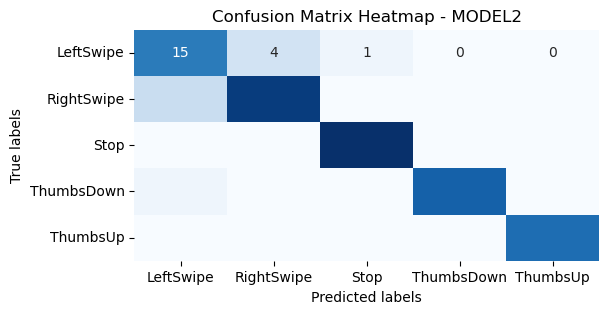

              precision    recall  f1-score   support

   LeftSwipe       0.71      0.75      0.73        20
  RightSwipe       0.83      0.80      0.82        25
        Stop       0.95      1.00      0.98        21
  ThumbsDown       1.00      0.94      0.97        18
    ThumbsUp       1.00      1.00      1.00        16

    accuracy                           0.89       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.89      0.89      0.89       100



In [37]:
actual_labels, predicted_labels = validate_data(model)
# show the classification report and confusion matrixshowReport(actual_labels, predicted_labels, modelName[1])
conf_matrix, class_report = showReport(actual_labels, predicted_labels, modelName[0])

In [78]:
f1_val = metrics.f1_score(actual_labels, predicted_labels, average='weighted')
f1_val

0.8903965179946056

In [80]:
# get the precision and recall
avg_recal_val = metrics.recall_score(actual_labels, predicted_labels, average='weighted')
avg_preci_val = metrics.precision_score(actual_labels, predicted_labels, average='weighted')

In [81]:
# add data to dataframe
results_multiclass.loc[len(results_multiclass)] = ['Model2_LSTM', num_epocs, loss_train, acc_train, loss_val, acc_val,
                                                   f1_val, avg_recal_val, avg_preci_val]

In [82]:
results_multiclass.T

,0
model,Model2_LSTM
epochs,40
training_loss,0.217234
training_accuracy,0.927536
validation_loss,0.239703
validation_accuracy,0.9
validation_f1,0.890397
validation_recall,0.89
validation_precision,0.891645


### Model 1

In [83]:
# initialize and compile the model
model1 = CNN(image_tensor)
model1.initializeModel(modelName[0])
model1.compileModel()

# set up the callback for the model fit
callback_list = model1.callbackSetup()

# fit the model
model1.fitModel(train_generator=train_generator, steps_per_epoch=steps_per_epoch,num_epochs=num_epocs, callbacks_list=callback_list, 
                val_generator=val_generator, validation_steps=validation_steps)

Epoch 1/40


2024-05-25 00:47:19.296719: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


23/23 [==============================] - ETA: 0s - loss: 2.1134 - categorical_accuracy: 0.2174

2024-05-25 00:47:54.783931: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]



Epoch 1: val_loss improved from inf to 9.27960, saving model to model_init_2024-05-2500_47_18.593684/model-keras.keras
23/23 [==============================] - 42s 2s/step - loss: 2.1134 - categorical_accuracy: 0.2174 - val_loss: 9.2796 - val_categorical_accuracy: 0.2000 - lr: 0.0010
Epoch 2/40
23/23 [==============================] - ETA: 0s - loss: 2.1707 - categorical_accuracy: 0.2464
Epoch 2: val_loss did not improve from 9.27960
23/23 [==============================] - 40s 2s/step - loss: 2.1707 - categorical_accuracy: 0.2464 - val_loss: 18.0647 - val_categorical_accuracy: 0.2000 - lr: 0.0010
Epoch 3/40
23/23 [==============================] - ETA: 0s - loss: 1.9300 - categorical_accuracy: 0.3623
Epoch 3: val_loss did not improve from 9.27960
23/23 [==============================] - 41s 2s/step - loss: 1.9300 - categorical_accuracy: 0.3623 - val_loss: 25.7250 - val_categorical_accuracy: 0.2750 - lr: 0.0010
Epoch 4/40
23/23 [==============================] - ETA: 0s - loss: 2.2742

In [84]:
# check the model summary
model1.model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 26, 124, 124, 16)  6016      
                                                                 
 max_pooling3d (MaxPooling3D  (None, 13, 62, 62, 16)   0         
 )                                                               
                                                                 
 batch_normalization_2 (Batc  (None, 13, 62, 62, 16)   64        
 hNormalization)                                                 
                                                                 
 conv3d_1 (Conv3D)           (None, 11, 60, 60, 32)    13856     
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 11, 30, 30, 32)   0         
 3D)                                                             
                                                        

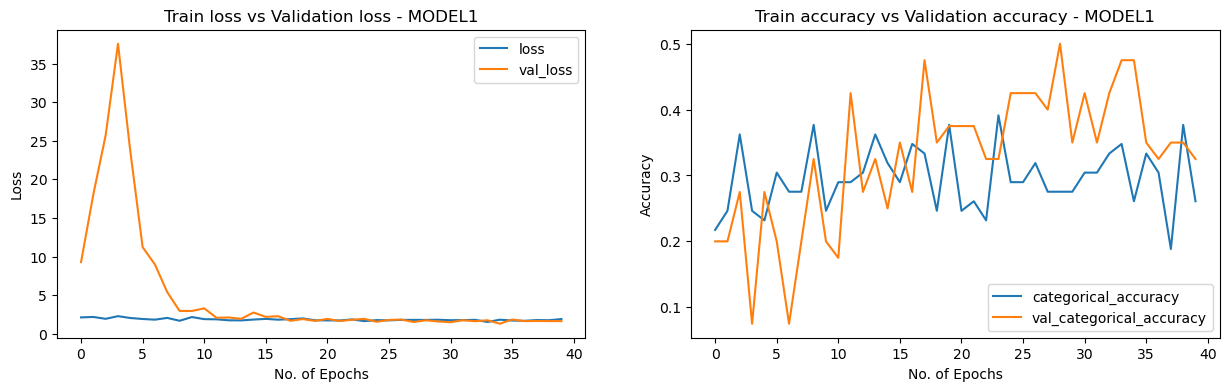

In [85]:
# show the model history 
pltShow.plotModelHistory(model1.history,modelName[0])

In [88]:
# get the accuracy and loss of training
loss_train1, acc_train1, loss_val1, acc_val1 = get_acc_loss(model1.history)


The accuracy of the training ::: 0.261
The loss of the training ::: 1.898


The accuracy of the validation ::: 0.325
The loss of the validation ::: 1.634


Source path =  /Users/jiten/Masters/Compute vision - CSC 528/CNN_Gesture_recognition/input/val ; batch size = 30
10/10 [==============================] - 1s 105ms/step

Confusion Matrix:::
[[ 2  7  3  0  4]
 [ 4 14  0  2  5]
 [ 3  4  9  4  4]
 [ 3  0  7  8  2]
 [ 5  0  4  2  4]]


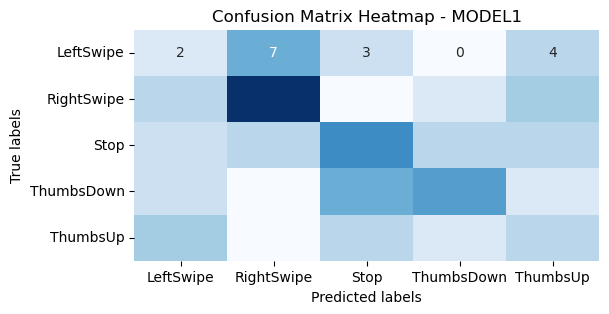

              precision    recall  f1-score   support

   LeftSwipe       0.12      0.12      0.12        16
  RightSwipe       0.56      0.56      0.56        25
        Stop       0.39      0.38      0.38        24
  ThumbsDown       0.50      0.40      0.44        20
    ThumbsUp       0.21      0.27      0.24        15

    accuracy                           0.37       100
   macro avg       0.36      0.35      0.35       100
weighted avg       0.38      0.37      0.38       100



In [91]:
actual_labels1, predicted_labels1 = validate_data(model1)
# show the classification report and confusion matrix
conf_matrix1, class_report1 = showReport(actual_labels1, predicted_labels1, modelName[0])

In [92]:
# get the f1 score for validation
f1_val1= metrics.f1_score(actual_labels1, predicted_labels1, average='weighted')
f1_val1

0.37549183954690846

In [96]:
# get the precissino and recall
avg_recal_val1 = metrics.recall_score(actual_labels1, predicted_labels1, average='weighted')
avg_preci_val1 = metrics.precision_score(actual_labels1, predicted_labels1, average='weighted')

In [99]:
# add data to dataframe
results_multiclass.loc[len(results_multiclass)] = ['Model1_CONV3D', num_epocs, loss_train1, acc_train1, loss_val1, acc_val1,
                                                   f1_val1, avg_recal_val1, avg_preci_val1]

In [100]:
results_multiclass.T

,0,1
model,Model2_LSTM,Model1_CONV3D
epochs,40,40
training_loss,0.217234,1.897849
training_accuracy,0.927536,0.26087
validation_loss,0.239703,1.634045
validation_accuracy,0.9,0.325
validation_f1,0.890397,0.375492
validation_recall,0.89,0.37
validation_precision,0.891645,0.384316
